<a href="https://colab.research.google.com/github/Minh0237/DA/blob/main/BT_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
df = pd.read_csv('Test.csv')

In [33]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [34]:
features = df["text"].values
labels = df["label"].values
print(f"Feature: {features[0]}")

Feature: I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy

In [35]:
def clean_features(features):
    clean_features = []
    for sentence in range(0, len(features)):

        processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

        processed_feature = re.sub(r'^b\s+', '', processed_feature)

        processed_feature = processed_feature.lower()

        clean_features.append(processed_feature)
    return clean_features

features = clean_features(features)
print(features[:2])

['i always wrote this series off as being complete stink fest because jim belushi was involved in it and heavily but then one day tragic happenstance occurred after white sox game ended realized that the remote was all the way on the other side of the room somehow now could have just gotten up and walked across the room to get the remote or even to the tv to turn the channel but then why not just get up and walk across the country to watch tv in another state nuts to that said so decided to just hang tight on the couch and take whatever fate had in store for me what fate had in store was an episode of this show an episode about which remember very little except that had once again made very broad general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with and once again was completely right this show is total crud pie belushi has all the comedic delivery of hairy lighthouse foghorn the women are physically attra

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4000 4000
1000 1000


In [37]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")

stemmer_obj = PorterStemmer()
lemmatizer_obj = WordNetLemmatizer()
list_stop_words_obj = set(stopwords.words("english"))


def clean_features_nltk(features, stemmer, lemmatizer, list_stop_words):
    clean_features = []
    for sentence in range(0, len(features)):

        sentence = re.sub(r'\W', ' ', str(features[sentence]))

        sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)

        sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', sentence)

        sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

        sentence = re.sub(r'^b\s+', '', sentence)

        sentence = sentence.lower()

        list_words = word_tokenize(sentence)

        list_words = [stemmer.stem(word) for word in list_words]

        list_words = [lemmatizer.lemmatize(word) for word in list_words]

        list_words = [word for word in list_words if (word.casefold() not in list_stop_words)]

        sentence = " ".join(list_words)

        clean_features.append(sentence)
    return clean_features

features = clean_features_nltk(features, stemmer_obj, lemmatizer_obj, list_stop_words_obj)
print(features[:2])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['alway wrote thi seri complet stink fest becaus jim belushi wa involv heavili one day tragic happenst occur white sox game end realiz remot wa way side room somehow could gotten walk across room get remot even tv turn channel whi get walk across countri watch tv anoth state nut said decid hang tight couch take whatev fate store fate store wa episod thi show episod rememb veri littl except onc made veri broad gener sweep blanket judgment base zero object experienti evid noth whatsoev back opinion onc wa complet right thi show total crud pie belushi ha comed deliveri hairi lighthous foghorn woman physic attract stepford elicit ani real feel viewer absolut reason stop run local tv station gasolin flamethrow send everi copi thi mutt howl back hell br br except br br except wonder comic sti ling larri joe campbel america greatest comic charact actor thi guy play belushi brother law andi gold good realli well asid funni hi job make belushi look good like tri make butt wart look good campbel

In [38]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4000 4000
1000 1000


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=5000)
vect.fit(x_train)

x_train_dtm = vect.transform(x_train).toarray()
x_test_dtm = vect.transform(x_test).toarray()

print(x_train_dtm[:1], len(x_train_dtm[0]))

[[0 0 0 ... 0 0 0]] 5000


Accuracy:0.625


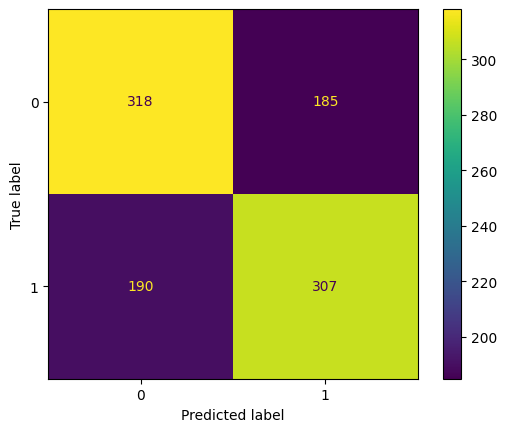

In [40]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

print(f"Accuracy:{accuracy_score(y_test, pred)}")

ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

In [41]:
print(len(x_train_dtm))
selected_idx = (np.count_nonzero(x_train_dtm, axis=1) >= 10)

x_train_dtm = x_train_dtm[selected_idx]
y_train = y_train[selected_idx]
print(len(x_train_dtm))

4000
3997


Accuracy:0.631


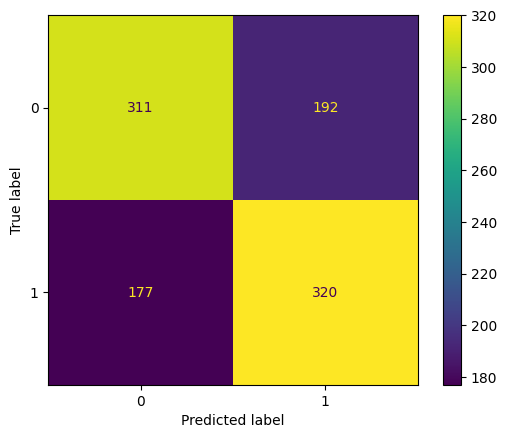

In [42]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

print(f"Accuracy:{accuracy_score(y_test, pred)}")

ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.9, stop_words="english")
vect.fit(x_train)

x_train_tfidf = vect.transform(x_train).toarray()
x_test_tfidf = vect.transform(x_test).toarray()

print(x_train_tfidf[:1], len(x_train_tfidf[0]))


[[0. 0. 0. ... 0. 0. 0.]] 2500


Accuracy:0.834


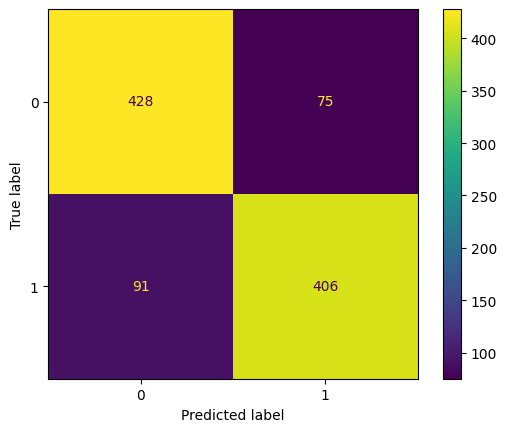

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay

model = MultinomialNB()

model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

print(f"Accuracy:{accuracy_score(y_test, pred)}")

ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

Accuracy:0.805


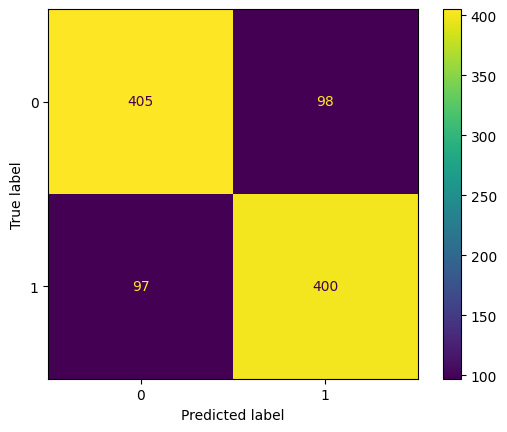

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

model = SVC(kernel='linear', random_state = 10)

model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

print(f"Accuracy:{accuracy_score(y_test, pred)}")

ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.839


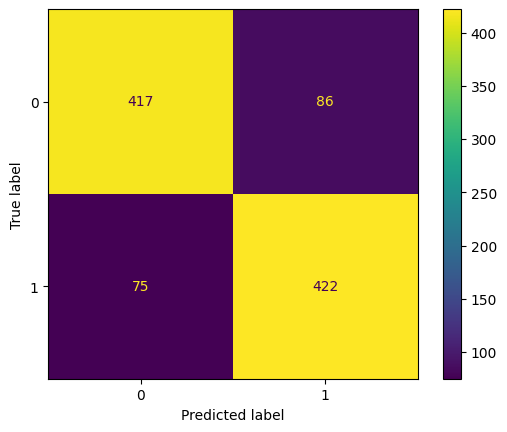

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

print(f"Accuracy:{accuracy_score(y_test, pred)}")

ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)

Accuracy:0.839


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


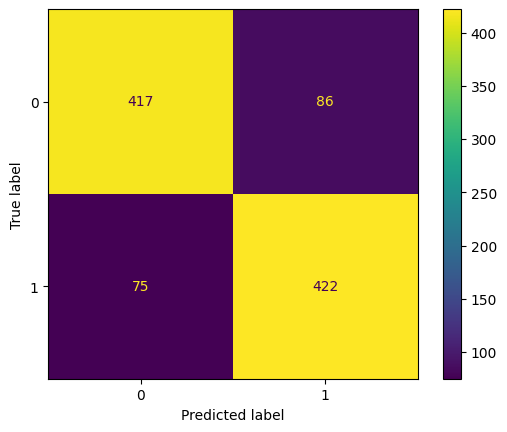

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

model = LogisticRegression()

model.fit(x_train_dtm, y_train)

pred = model.predict(x_test_dtm)

print(f"Accuracy:{accuracy_score(y_test, pred)}")

ConfusionMatrixDisplay.from_estimator(model, x_test_dtm, y_test)